In [27]:
#import the important libraries needed
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler


In [29]:
#Load the dataset
pubg = pd.read_csv("C:/Users/rajpr/Desktop/Prabhat/Machine Learning/Assignment_PUBG_Dataset_Analysis/PUBG_Dataset.csv")
pubg.head(5)

df = pd.DataFrame(pubg)

# Remove column as index base 
df.drop(df.columns[[0]], axis = 1, inplace = True)
#print(df.describe())

#print(X)
X=df[['longestKill','matchDuration','walkDistance']]
#print(Y)
Y=df[list(df.columns)[-2]]

In [30]:
#standard scalar function
scaler=StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled_data=scaler.transform(df)

In [32]:
scaled_data

array([[-0.46528877,  1.14133509,  0.76891497, -0.44809034],
       [ 7.5479753 ,  0.8628546 ,  0.77300145,  0.69900052],
       [-0.46528877,  0.79418818,  0.85745539, -0.28770633],
       ...,
       [-0.46528877, -0.70121385,  0.58910981, -0.7418066 ],
       [ 0.02803956, -0.73173226, -1.27568764, -0.73851544],
       [ 0.02228259,  1.08411307, -1.27568764,  1.5193832 ]])

In [34]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components = 2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
 #first split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

print(X_train.shape, X_test.shape)

(375, 3) (125, 3)


In [38]:
x_pca=pca.transform(scaled_data)

In [39]:
scaled_data.shape

(500, 4)

In [40]:
x_pca.shape

(500, 2)

In [41]:
print(scaled_data)

[[-0.46528877  1.14133509  0.76891497 -0.44809034]
 [ 7.5479753   0.8628546   0.77300145  0.69900052]
 [-0.46528877  0.79418818  0.85745539 -0.28770633]
 ...
 [-0.46528877 -0.70121385  0.58910981 -0.7418066 ]
 [ 0.02803956 -0.73173226 -1.27568764 -0.73851544]
 [ 0.02228259  1.08411307 -1.27568764  1.5193832 ]]


Text(0, 0.5, 'Second principle component')

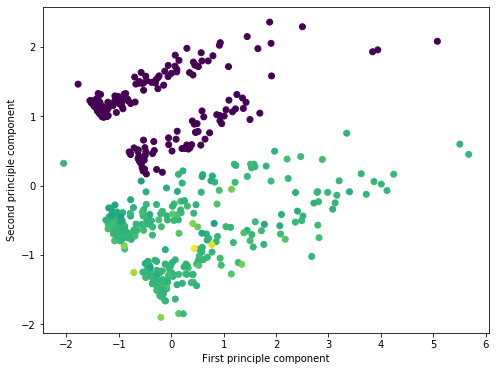

In [23]:
#x_pca

#plotting section
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=Y)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [43]:
#Clustering model
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [44]:
#strong clustering
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(scaled_data)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [45]:
centers = model.cluster_centers_
centers

array([[-0.32967795,  1.0949272 ,  0.77184065, -0.20031023],
       [ 2.30852627,  0.45395111,  0.49781937,  1.55741711],
       [-0.24908303, -0.13888702, -1.27559783, -0.0336334 ],
       [-0.26070544, -0.831324  ,  0.78008469, -0.35590768]])